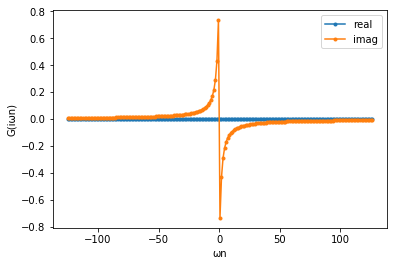

elapsed_time:0.2767069339752197[sec]


In [1]:
#G(iωn)のグラフ。それぞれのnに対するkの配列を作り、G_iwnを求める。nに対してループする。

import numpy as np
import matplotlib.pyplot as plt
import time

#逆温度
beta=5

#ω_n
n=np.arange(-100,101)
w_n=np.pi*(2*n+1)/beta

#時間計測開始
start = time.time()

# 積分の変域
a = -2
b =  2

#被積分関数
def f(x,w_n):
    return np.sqrt(4-x**2)/((2*np.pi)*(1J*w_n-x))

#二重指数型積分
h=1/200#刻み幅
k=np.arange(-1000,1001)
g=np.pi/2*np.sinh(k*h)
G_iwn=np.empty(0)
for w in w_n:
    dG=(b-a)/2*f((b-a)/2*np.tanh(g)+(a+b)/2,w)*np.cosh(k*h)/(np.cosh(g))**2 #2001個の配列
    G_iwn=np.append(G_iwn,np.pi*h/2*np.sum(dG))

#グラフ
plt.plot(w_n, G_iwn.real,label='real', marker=".")
plt.plot(w_n, G_iwn.imag,label='imag', marker=".")
plt.xlabel('ωn')
plt.ylabel('G(iωn)')
plt.legend()
plt.show()

#時間計測終了
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

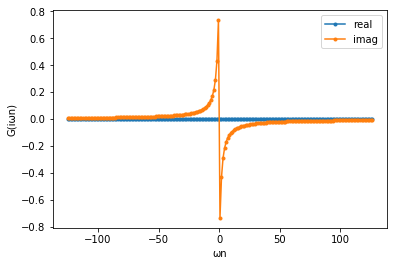

elapsed_time:2.5059330463409424[sec]


In [2]:
#G(iωn)のグラフ。積分を和に直した式をg(n,k)とh(k)に分け、行列とベクトルの積をとる。gとhはリスト内包表記を用いて作る。

import numpy as np
import matplotlib.pyplot as plt
import time

#逆温度
beta=5

#ω_n
n=np.arange(-100,101)
w_n=np.pi*(2*n+1)/beta

#時間計測開始
start = time.time()

h=1/200#刻み幅
def g(n):
    return [1/(1J*(np.pi*(2*n+1)/beta)-2*np.tanh(np.pi/2*np.sinh(k*h))) for k in np.arange(-1000,1001)]

g_matrix=np.array([g(i) for i in n])
h_matrix=np.array([np.cosh(k*h)/((np.cosh(np.pi/2*np.sinh(k*h)))**3) for k in np.arange(-1000,1001)])

G_iwn=h*np.dot(g_matrix,h_matrix)

#グラフ
plt.plot(w_n, G_iwn.real,label='real', marker=".")
plt.plot(w_n, G_iwn.imag,label='imag', marker=".")
plt.xlabel('ωn')
plt.ylabel('G(iωn)')
plt.legend()
plt.show()

#時間計測終了
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

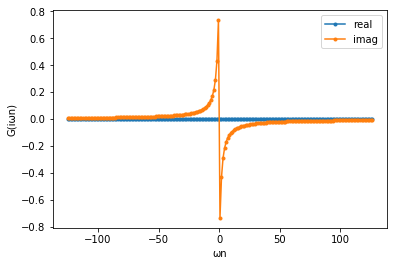

elapsed_time:0.21933484077453613[sec]


In [14]:
#G(iωn)のグラフ。積分を和に直した式をg(n,k)とh(k)に分け、行列とベクトルの積をとる。gとhはnumpy.fromfunctionを用いて作る。

import numpy as np
import matplotlib.pyplot as plt
import time

#逆温度
beta=5

#ω_n
n=np.arange(-100,101)
w_n=np.pi*(2*n+1)/beta

#時間計測開始
start = time.time()

h=1/200#刻み幅

g_matrix=np.fromfunction(lambda i,j:1/(1J*(np.pi*(2*(i-100)+1)/beta)-2*np.tanh(np.pi/2*np.sinh((j-1000)*h))) , (201,2001))
k=np.arange(-1000,1001)
h_vector=np.cosh(k*h)/((np.cosh(np.pi/2*np.sinh(k*h)))**3)
G_iwn=h*np.dot(g_matrix,h_vector)

#グラフ
plt.plot(w_n, G_iwn.real,label='real', marker=".")
plt.plot(w_n, G_iwn.imag,label='imag', marker=".")
plt.xlabel('ωn')
plt.ylabel('G(iωn)')
plt.legend()
plt.show()

#時間計測終了
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

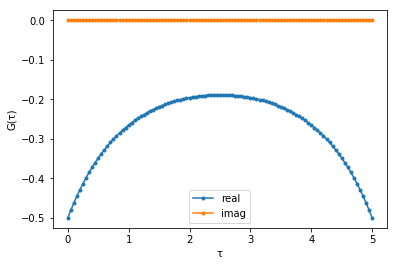

In [15]:
#G_tのグラフ。G_iwnをフーリエ変換。上で得られたG_iwnを使用

beta=5
G_t=np.empty(0)
t=np.linspace(0,beta,101)

for i in t:    
    dG=1/beta*np.dot(G_iwn-1/(1J*w_n),np.exp(-1J*w_n*i))
    G=np.sum(dG)-1/2
    G_t=np.append(G_t,G)

#print(G_t)    

plt.plot(t, G_t.real,label='real' ,marker=".")
plt.plot(t, G_t.imag,label='imag',  marker=".")
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()


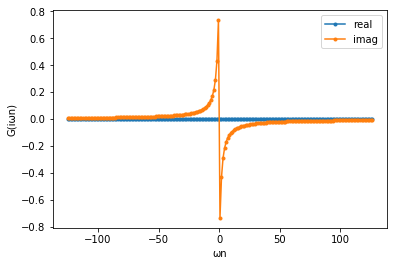

In [16]:
#G_iwnのグラフ。解析解
import numpy as np
import matplotlib.pyplot as plt


#逆温度
beta=5

#ω_n
n_minus=np.arange(-100,0)
n_plus=np.arange(0,101)
w_n_minus=np.pi*(2*n_minus+1)/beta
w_n_plus=np.pi*(2*n_plus+1)/beta

w_n=np.hstack((w_n_minus,w_n_plus))

#G_iwn
G_iwn_plus=(w_n_plus-np.sqrt(w_n_plus**2+4))*1J/2
G_iwn_minus=(w_n_minus+np.sqrt(w_n_minus**2+4))*1J/2
G_iwn=np.hstack((G_iwn_minus,G_iwn_plus))


#グラフ
plt.plot(w_n, G_iwn.real,label='real', marker=".")
plt.plot(w_n, G_iwn.imag,label='imag', marker=".")
plt.xlabel('ωn')
plt.ylabel('G(iωn)')
plt.legend()
plt.show()

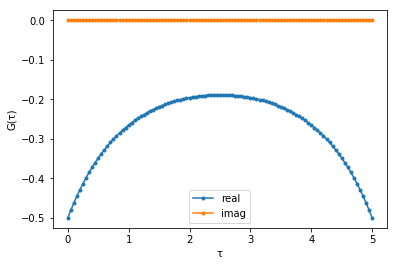

In [18]:
#G_tのグラフ。G_iwnをフーリエ変換。上で得られたG_iwnを使用

beta=5
G_t=np.empty(0)
t=np.linspace(0,beta,101)

for i in t:    
    dG=1/beta*np.dot(G_iwn-1/(1J*w_n),np.exp(-1J*w_n*i))
    G=np.sum(dG)-1/2
    G_t=np.append(G_t,G)

#print(G_t)    

plt.plot(t, G_t.real,label='real' ,marker=".")
plt.plot(t, G_t.imag,label='imag',  marker=".")
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()


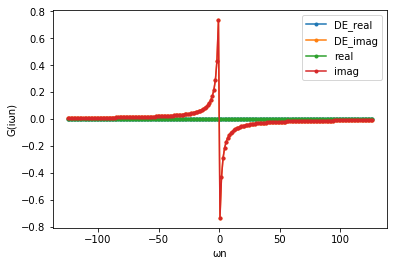

In [19]:
#G_iwnのグラフ。解析解と数値計算が一致するか確認する。

import numpy as np
import matplotlib.pyplot as plt

#逆温度
beta=5

#二重指数型積分(DE)
#ω_n
n=np.arange(-100,101)
w_n=np.pi*(2*n+1)/beta
h=1/200#刻み幅
g_matrix=np.fromfunction(lambda i,j:1/(1J*(np.pi*(2*(i-100)+1)/beta)-2*np.tanh(np.pi/2*np.sinh((j-1000)*h))) , (201,2001))
k=np.arange(-1000,1001)
h_vector=np.cosh(k*h)/((np.cosh(np.pi/2*np.sinh(k*h)))**3)
G_iwn_DE=h*np.dot(g_matrix,h_vector)

#解析解
n_minus=np.arange(-100,0)
n_plus=np.arange(0,101)
w_n_minus=np.pi*(2*n_minus+1)/beta
w_n_plus=np.pi*(2*n_plus+1)/beta
w_n=np.hstack((w_n_minus,w_n_plus))
G_iwn_plus=(w_n_plus-np.sqrt(w_n_plus**2+4))*1J/2
G_iwn_minus=(w_n_minus+np.sqrt(w_n_minus**2+4))*1J/2
G_iwn=np.hstack((G_iwn_minus,G_iwn_plus))

#グラフ
plt.plot(w_n, G_iwn_DE.real,label='DE_real', marker=".")
plt.plot(w_n, G_iwn_DE.imag,label='DE_imag', marker=".")
plt.plot(w_n, G_iwn.real,label='real', marker=".")
plt.plot(w_n, G_iwn.imag,label='imag', marker=".")
plt.xlabel('ωn')
plt.ylabel('G(iωn)')
plt.legend()
plt.show()


6.98131965648e-06


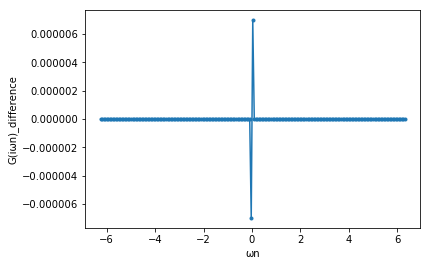

In [8]:
#解析解との差

G_iwn_difference=(G_iwn-G_iwn_DE).imag

print(np.max(G_iwn_difference))

plt.plot(w_n, G_iwn_difference, marker=".")
plt.xlabel('ωn')
plt.ylabel('G(iωn)_difference')
plt.show()
